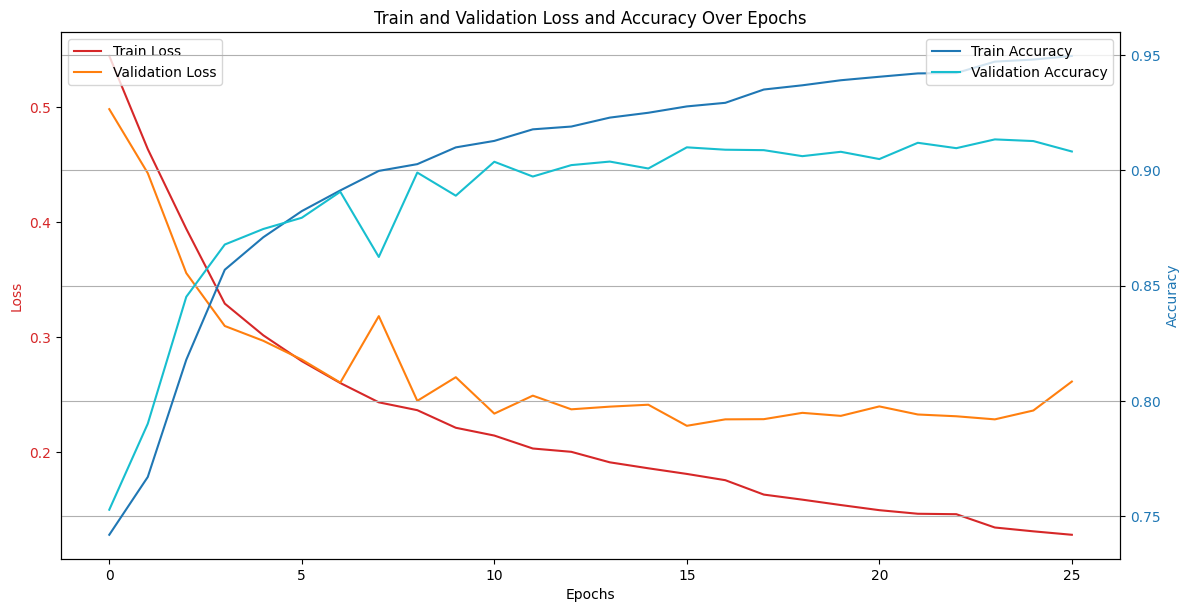

In [ ]:
import matplotlib.pyplot as plt
import re

# 로그 파일에서 값 읽어오기
def read_log_file(log_file):
    epochs = []
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    pattern = re.compile(r'\[Epoch (\d+)\].*train_acc: ([\d\.]+), val_acc: ([\d\.]+), train_loss: ([\d\.]+), val_loss: ([\d\.]+)')

    with open(log_file, 'r') as f:
        for line in f:
            match = pattern.search(line)
            if match:
                epoch = int(match.group(1))
                train_acc = float(match.group(2))
                val_acc = float(match.group(3))
                train_loss = float(match.group(4))
                val_loss = float(match.group(5))
                epochs.append(epoch)
                train_accuracies.append(train_acc)
                val_accuracies.append(val_acc)
                train_losses.append(train_loss)
                val_losses.append(val_loss)

    return epochs, train_losses, val_losses, train_accuracies, val_accuracies

# 로그 파일 경로
log_file = 'log.txt'

# 로그 파일에서 값 읽기
epochs, train_losses, val_losses, train_accuracies, val_accuracies = read_log_file(log_file)

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color=color)
ax1.plot(epochs, train_losses, label='Train Loss', color='tab:red')
ax1.plot(epochs, val_losses, label='Validation Loss', color='tab:orange')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Accuracy', color=color)
ax2.plot(epochs, train_accuracies, label='Train Accuracy', color='tab:blue')
ax2.plot(epochs, val_accuracies, label='Validation Accuracy', color='tab:cyan')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()
plt.title('Train and Validation Loss and Accuracy Over Epochs')
plt.grid(True)
plt.show()